## Airplane tourism example

In [29]:
import numpy as np
import decision_labs.airplane as ap

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [63]:
# experiment parameters setup
p_showup = 0.85
p_couple = 0.6
nr_samples = 10000
true_expectation = p_showup * 3

rng = np.random.default_rng(seed=1319)
y_individuals = rng.binomial(n=3, p=p_showup, size=nr_samples)

print(f"The empirical average nr of individuals who show up is: {y_individuals.mean()}")
print(f"The theoretical average nr of individuals who show up is: {true_expectation}")

The empirical average nr of individuals who show up is: 2.5601
The theoretical average nr of individuals who show up is: 2.55


In [64]:
df = ap.compute_nr_passengers(p_showup, p_couple, nr_samples=nr_samples, seed=1321)
df.head(10)

,has_couple,y_mix,y_individual,nr_show_up
0,0,0,2,2
1,0,0,3,3
2,1,3,0,3
3,1,1,0,1
4,1,1,0,1
5,1,2,0,2
6,1,3,0,3
7,0,0,3,3
8,1,2,0,2
9,1,3,0,3


In [65]:
# Check that the formula was composed correctly
int((df.y_mix + df.y_individual - df.nr_show_up).sum())

0

In [68]:
(df
 .groupby("has_couple")
 .agg({
    'nr_show_up': ['mean'], 
    'has_couple': ['count']
 })
 .droplevel(axis=1, level=0).reset_index()
 .rename(columns={"mean": "avg_nr_showup", 'count': 'nr_trips'})
 .style
 .format({'avg_nr_showup': '{:,.2f}'})
 .bar(subset='nr_trips', color = "lightgrey")
)

,has_couple,avg_nr_showup,nr_trips
0,0,2.51,1601
1,1,2.29,8399


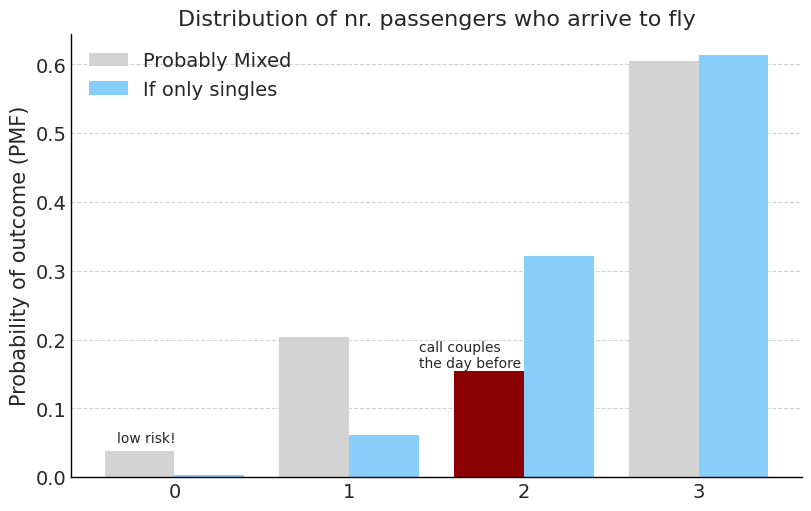

In [67]:
ap.plot_passengers(df, p_showup=p_showup)